## Customer Segmentation using KMeans Clustering using RFM

### Import libraries

In [173]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

### Reading data

In [174]:
df = pd.read_excel('Online Retail.xlsx')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [176]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [177]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [178]:
# Taking only positive Quantity and UnitPrice
df2 = df[(df['UnitPrice']>0) & (df['Quantity']>0)].reset_index(drop=True)

# Dropping null rows
df2 = df2.dropna().reset_index(drop=True)

In [179]:
data = df2.copy()

In [180]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [181]:
data['Spend'] = data['Quantity'] * data['UnitPrice']

In [182]:
max_date = data['InvoiceDate'].max()
min_date = data['InvoiceDate'].min()

print('--minimum date--',min_date)
print('--maximum date--',max_date)

--minimum date-- 2010-12-01 08:26:00
--maximum date-- 2011-12-09 12:50:00


### Creating RFM Table 

In [183]:
dfg = data.groupby(['CustomerID']).agg(Monetory = ('Spend',np.sum), # total spend by a customer
                                Recency = ('InvoiceDate',np.max), # last date the customer appeared
                                Frequency = ('CustomerID',np.size)).reset_index() # total number of transactions by a customer

In [184]:
# Finding the number of days since the customer made a purchase
dfg['Rece'] = (max_date - dfg['Recency']).dt.days
dfg

,CustomerID,Monetory,Recency,Frequency,Rece
0,12346.0,77183.60,2011-01-18 10:01:00,1.0,325
1,12347.0,4310.00,2011-12-07 15:52:00,182.0,1
2,12348.0,1797.24,2011-09-25 13:13:00,31.0,74
3,12349.0,1757.55,2011-11-21 09:51:00,73.0,18
4,12350.0,334.40,2011-02-02 16:01:00,17.0,309
...,...,...,...,...,...
4333,18280.0,180.60,2011-03-07 09:52:00,10.0,277
4334,18281.0,80.82,2011-06-12 10:53:00,7.0,180
4335,18282.0,178.05,2011-12-02 11:43:00,12.0,7
4336,18283.0,2094.88,2011-12-06 12:02:00,756.0,3


In [185]:
dfg.drop(columns='Recency',axis=1,inplace=True)

In [186]:
dfg['Rece'] = dfg['Rece']+1
dfg.describe()

,CustomerID,Monetory,Frequency,Rece
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,2054.266460,91.720609,92.536422
std,1721.808492,8989.230441,228.785094,100.014169
min,12346.000000,3.750000,1.000000,1.000000
25%,13813.250000,307.415000,17.000000,18.000000
50%,15299.500000,674.485000,41.000000,51.000000
75%,16778.750000,1661.740000,100.000000,142.000000
max,18287.000000,280206.020000,7847.000000,374.000000


In [187]:
dfg.head()

,CustomerID,Monetory,Frequency,Rece
0,12346.0,77183.60,1.0,326
1,12347.0,4310.00,182.0,2
2,12348.0,1797.24,31.0,75
3,12349.0,1757.55,73.0,19
4,12350.0,334.40,17.0,310


### Normalization of data using transformations

<AxesSubplot:xlabel='Rece_boxcox'>

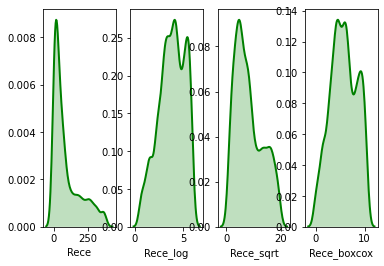

In [188]:
##### Transformations to get normal distribution
dfg['Rece_log'] = np.log(dfg['Rece']+1)
dfg['Rece_sqrt'] = np.sqrt(dfg['Rece'])
dfg['Rece_boxcox'] = stats.boxcox(dfg['Rece'])[0] # stats.boxcox return 2 values

# creating axes to draw plots for Recency
fig, ax = plt.subplots(1, 4)
  
# plotting the original data(non-normal) and 
sns.distplot(dfg['Rece'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])

sns.distplot(dfg['Rece_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])

sns.distplot(dfg['Rece_sqrt'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[2])

sns.distplot(dfg['Rece_boxcox'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[3])

<AxesSubplot:xlabel='Frequency_boxcox'>

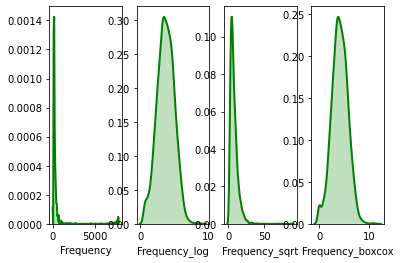

In [189]:
##### Transformations to get normal distribution
dfg['Frequency_log'] = np.log(dfg['Frequency']+1)
dfg['Frequency_sqrt'] = np.sqrt(dfg['Frequency'])
dfg['Frequency_boxcox'] = stats.boxcox(dfg['Frequency'])[0] # stats.boxcox return 2 values

# creating axes to draw plots for Recency
fig, ax = plt.subplots(1, 4)
  
# plotting the original data(non-normal) and 
sns.distplot(dfg['Frequency'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])

sns.distplot(dfg['Frequency_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])

sns.distplot(dfg['Frequency_sqrt'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[2])

sns.distplot(dfg['Frequency_boxcox'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[3])

<AxesSubplot:xlabel='Monetory_boxcox'>

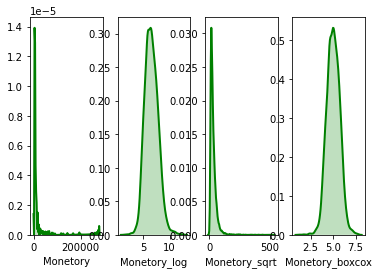

In [190]:
##### Transformations to get normal distribution
dfg['Monetory_log'] = np.log(dfg['Monetory']+1)
dfg['Monetory_sqrt'] = np.sqrt(dfg['Monetory'])
dfg['Monetory_boxcox'] = stats.boxcox(dfg['Monetory'])[0] # stats.boxcox return 2 values

# creating axes to draw plots for Recency
fig, ax = plt.subplots(1, 4)
  
# plotting the original data(non-normal) and 
sns.distplot(dfg['Monetory'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])

sns.distplot(dfg['Monetory_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])

sns.distplot(dfg['Monetory_sqrt'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[2])

sns.distplot(dfg['Monetory_boxcox'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[3])

### Finding skew for each columns - closer to 0 should be selected

In [191]:
dfg.skew(axis = 0, skipna = True)

CustomerID           0.000999
Monetory            19.324953
Frequency           18.106165
Rece                 1.246048
Rece_log            -0.379169
Rece_sqrt            0.588700
Rece_boxcox         -0.070402
Frequency_log       -0.014045
Frequency_sqrt       3.223316
Frequency_boxcox     0.004135
Monetory_log         0.393553
Monetory_sqrt        5.887797
Monetory_boxcox     -0.015831
dtype: float64

In [192]:
## Taking columns having skew closer to 0 for each RFM
customers = pd.DataFrame()
customers['Recency'] = dfg['Rece_boxcox']
customers['Frequency'] = dfg['Frequency_boxcox']
customers['Monetory'] = dfg['Monetory_boxcox']

In [193]:
customers.head()

,Recency,Frequency,Monetory
0,10.039089,0.000000,7.280024
1,0.737107,5.967408,6.011123
2,6.460361,3.756089,5.561659
3,3.855960,4.800962,5.549746
4,9.900640,3.050162,4.599025


In [194]:
customers.describe()

,Recency,Frequency,Monetory
count,4338.000000,4338.000000,4338.000000
mean,5.678931,4.105681,5.023563
std,2.683698,1.596619,0.717761
min,0.000000,0.000000,1.251042
25%,3.765704,3.050162,4.547197
50%,5.664350,4.092125,5.017231
75%,7.902354,5.196619,5.519744
max,10.423264,11.395847,7.754964


In [195]:
####### To normalize the data so that each variable has same mean and variance #####
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new = sc.fit_transform(customers)

In [196]:
new

array([[ 1.62487001, -2.57178095,  3.14411434],
       [-1.84163571,  1.16617768,  1.37604893],
       [ 0.29121018, -0.21898305,  0.74977397],
       ...,
       [-1.18095643, -0.91134674, -1.14510853],
       [-1.5313799 ,  2.37588685,  0.86284663],
       [-0.1303989 ,  0.40277588,  0.76612172]])

In [197]:
customer = pd.DataFrame(new,columns=['Recency','Frequency','Monetory'])
customer.head()

,Recency,Frequency,Monetory
0,1.624870,-2.571781,3.144114
1,-1.841636,1.166178,1.376049
2,0.291210,-0.218983,0.749774
3,-0.679354,0.435521,0.733175
4,1.573275,-0.661173,-0.591544


In [198]:
customer['Customer'] = dfg['CustomerID']
customer = customer[['Customer','Recency','Frequency','Monetory']]
customer.head()

,Customer,Recency,Frequency,Monetory
0,12346.0,1.624870,-2.571781,3.144114
1,12347.0,-1.841636,1.166178,1.376049
2,12348.0,0.291210,-0.218983,0.749774
3,12349.0,-0.679354,0.435521,0.733175
4,12350.0,1.573275,-0.661173,-0.591544


<AxesSubplot:xlabel='Monetory'>

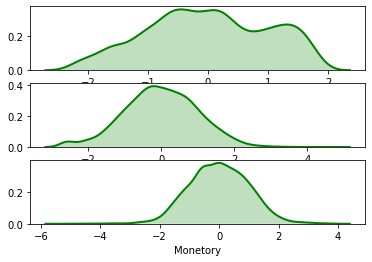

In [199]:
fig, ax = plt.subplots(3, 1)
  
# plotting the original data(non-normal) and 
sns.distplot(customer['Recency'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])

sns.distplot(customer['Frequency'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])

sns.distplot(customer['Monetory'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[2])


## Modelling ##

In [200]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = {}
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(customer.iloc[:,1:].values)
    sse[i] = kmeans.inertia_

### Plotting number of clusters with SSE

<AxesSubplot:>

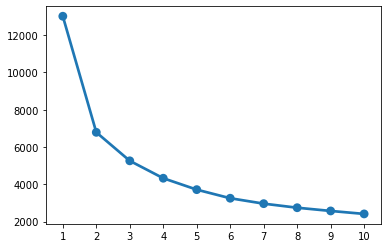

In [201]:
import seaborn as sns
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))

In [202]:
# Silhoutte scoring
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(customer.iloc[:,1:].values)
sse[i] = kmeans.inertia_

cluster_labels = kmeans.labels_

silhouette_score(customer.iloc[:,1:].values, cluster_labels)

0.29897392734095685

In [203]:
# Selecting ideal cluster number as 3
model = KMeans(n_clusters=3,random_state=42)
model.fit(customer.iloc[:,1:].values)
model.labels_.shape

(4338,)

In [204]:
customer['Cluster'] = model.labels_

In [205]:
customer.groupby(['Cluster']).agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetory':['mean','count']})

Recency Frequency  Monetory      
             mean      mean      mean count
Cluster                                    
0       -0.084509  0.001534  0.006679  1814
1        0.934916 -0.979931 -0.975085  1350
2       -0.944495  1.124466  1.110945  1174

In [206]:
customer.head()

,Customer,Recency,Frequency,Monetory,Cluster
0,12346.0,1.624870,-2.571781,3.144114,0
1,12347.0,-1.841636,1.166178,1.376049,2
2,12348.0,0.291210,-0.218983,0.749774,0
3,12349.0,-0.679354,0.435521,0.733175,2
4,12350.0,1.573275,-0.661173,-0.591544,1


### Creating snake plot to analyse clusters

In [207]:
dl = pd.melt(customer,
       id_vars=['Customer','Cluster'],
       value_vars=['Recency','Frequency','Monetory']).sort_values('Customer').reset_index(drop=True)
dl.head(10)

,Customer,Cluster,variable,value
0,12346.0,0,Recency,1.624870
1,12346.0,0,Frequency,-2.571781
2,12346.0,0,Monetory,3.144114
3,12347.0,2,Recency,-1.841636
4,12347.0,2,Frequency,1.166178
5,12347.0,2,Monetory,1.376049
6,12348.0,0,Recency,0.291210
7,12348.0,0,Frequency,-0.218983
8,12348.0,0,Monetory,0.749774
9,12349.0,2,Recency,-0.679354


<AxesSubplot:xlabel='variable', ylabel='value'>

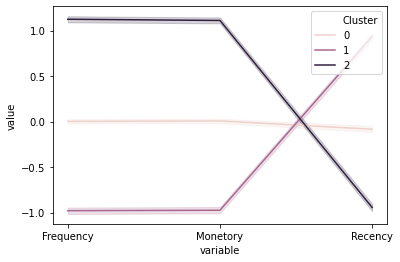

In [208]:
sns.lineplot(data= dl,x='variable',y='value',hue='Cluster')

In [209]:
# 0 - risk of leaving - low freq, low monetory, but visited the site
# 1 - churned - low freq, low monetory, not recent
# 2 - best customer - high freq, high monetory, recent